In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
import matplotlib

from sklearn.svm import LinearSVC, SVC, SVR
from mpl_toolkits.mplot3d import Axes3D

from utils import *

(300, 400, 3)
(120000, 3) (120000,) (120000,)


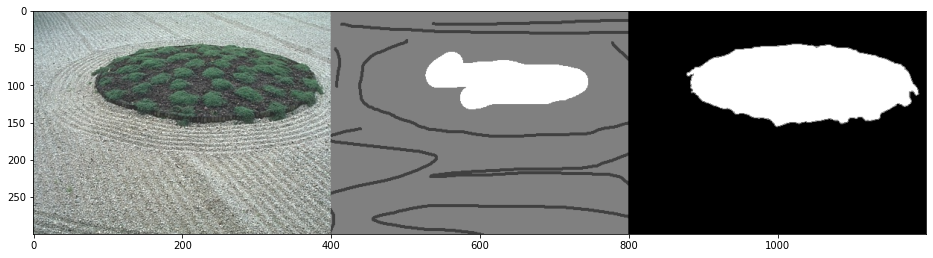

In [138]:
filename = '86016.bmp'
mini_paths = ['images', 'bordes_mr', 'bordes_real']
path = '../datasets/imagenes_segmentacion'
imgs = []
stimg = 0
for i, pt in enumerate(mini_paths):
    imgs.append( cv2.imread(path+'/'+pt+'/'+filename) ) 
    imgs[i] = cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB)
stimg = stackImages(1.0 , [ imgs[0].copy(), imgs[1].copy(), imgs[2].copy() ] ) 

print(imgs[0].shape)

row, col = 0,0
imgsX = []
for i, img in enumerate(imgs):
    a,b,ch = img.shape
    row, col = a,b
    cosa = img.copy()
    imgsX.append( np.reshape(cosa, (a*b,ch) ) )
    if i != 0: imgsX[i] = imgsX[i][:,0]

img, mask, real = imgsX[0], imgsX[1], imgsX[2]
print(img.shape, mask.shape, real.shape )

plt.figure(figsize=(16,16))
plt.imshow(stimg)

In [90]:
values = np.unique(mask)
values

array([ 64, 128, 255], dtype=uint8)

In [102]:
obj = img[ mask==255, : ]
bck = img[ mask==64, : ]

x_train = np.concatenate( (obj, bck), axis=0 )

y_obj = np.ones(len(obj))*255
y_bck = np.zeros(len(bck))
y_train = np.concatenate( (y_obj, y_bck), axis=0 )

obj.shape, bck.shape

((10791, 3), (10617, 3))

In [140]:
model = SVC()
model.fit(x_train, y_train)
pred = model.predict(img)
pred.shape

(120000,)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(300, 400, 3) (300, 400, 3)


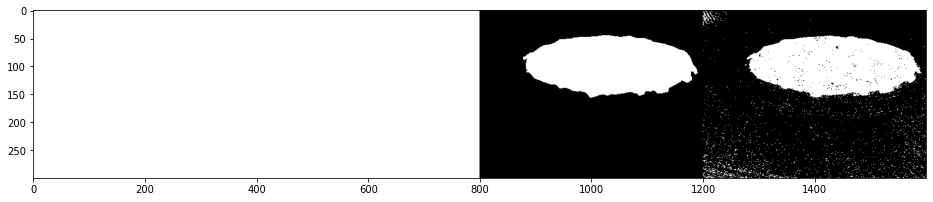

In [142]:
cosa = pred.copy()
pred_copy = np.reshape(cosa, (a,b,1))
pred_copy = np.concatenate((pred_copy,pred_copy,pred_copy), axis=2)
print( imgs[0].shape, pred_copy.shape )
stimg = stackImages(1.0 , [ [ imgs[0].copy(), imgs[1].copy() ]]) # ,[ imgs[2].copy(), pred_copy ] ] ) 
stimg2 = stackImages(1.0 , [ [ imgs[2].copy(), pred_copy ] ] ) 
stimg = np.concatenate( (stimg, stimg2), axis=1 )
plt.figure(figsize=(16,16))
plt.imshow( stimg, cmap='gray')

# SUPPORT VECTOR REGRESSION

In [149]:
df = pd.read_csv('../datasets/conagua.csv', encoding='ISO-8859-1')
df.head()

,LON,LAT,EDO,CLAVE,ESTACION,ene-22
0,-102.309722,21.895000,AGS,AGSAG,"Aguascalientes, Ags.",1.50
1,-102.585833,22.177222,AGS,ALMAG,"Alamitos, Ags.",5.50
2,-102.184167,21.738611,AGS,BRTAG,"San Bartolo, Ags.",0.00
3,-102.712222,21.849167,AGS,CALVILLO,"Calvillo, Ags. SMN*",1.75
4,-102.676944,21.997500,AGS,CDRAG,"La Codorniz, Ags.",0.00


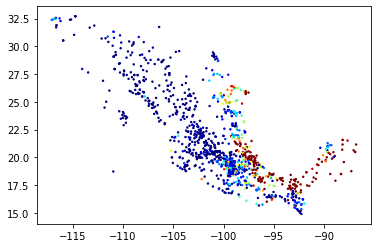

In [150]:
plt.figure()
plt.scatter(df['LON'].values,df['LAT'].values,s=2,c=df.values[:,-1],vmin=0,vmax=40,cmap='jet')
plt.show()

In [154]:
model = SVR( kernel = 'linear' )
model.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

## LANDMARKS

In [ ]:
nL = 100
n = len(X_train)

In [ ]:
XL_train = np.zeros((n,nL))
for i in range(n):
    for j in range(nL):
        XL_train[i, j] = np.linalg.norm( (X_train[i, :] - XL[j,:] ) )

In [ ]:
minx,miny = np.min(Xtrain,axis=0)
maxx,maxy = np.max(Xtrain,axis=0)

N = 100
rowx = np.linspace(minx, maxx, N)
rowy = np.linspace(miny, maxy, N)
xx, yy = np.meshgrid(rowx, rowy)
zz = np.zeros((N, N), float)
color = np.zeros((N,N,4))

norm = matplotlib.colors.Normalize(vmin=0, vmax=40)
for x in range(N):
    for y in range(N):
        vec = np.array([[ xx[x, y], yy[x, y] ]])

        vecL = np.zeros((1, nL))
        for j in range(nL):
            vecL[0,j] = np.linalg.norm( (vec- XL[j,:]) )

        zz[x,y] = model.predict(vec)
        c = list(matplotlib.cm.jet(norm(zz[x, y])))
        color[N-1 - x, y, :] = c
color = (color * 255).astype(int)

plt.figure()
plt.scatter(df['LON'].values,df['LAT'].values,s=2,c=df.values[:,-1],vmin=0,vmax=40,cmap='jet')
plt.imshow(color,extent=(minx,maxx,miny,maxy),alpha=0.5)
plt.xticks([])
plt.yticks([])
plt.xlim([minx, maxx])
plt.ylim([miny, maxy])
plt.show()

In [ ]:
model = SVR( kernel = 'linear' )
model.fit(XL_train, Y_train)